In [1]:
import cv2
import os
import sys
import matplotlib.pyplot as plt
import xml.etree.ElementTree as ET
import numpy as np
from pathlib import Path

In [2]:
notebook_dir = Path.cwd()
project_root = notebook_dir.parent
project_root_str = str(project_root.resolve())
sys.path.insert(0, project_root_str)

In [3]:
from src.utils.label_extraction import extract_objects_from_xml
from src.utils.visualization import draw_bounding_box, plot_image_grid

xml_filename_to_process = 'finding_01.xml'
xml_relative_path = Path('data/ground_truth') / xml_filename_to_process
xml_absolute_path = project_root / xml_relative_path

image_filename, extracted_objects = extract_objects_from_xml(str(xml_absolute_path))
image_filename = str(project_root / Path('data/images/finding_01.jpg'))

bounding_boxes_points = []
for obj in extracted_objects:
    bbox = obj['bbox']
    xmin = int(round(bbox['xmin']))
    ymin = int(round(bbox['ymin']))
    xmax = int(round(bbox['xmax']))
    ymax = int(round(bbox['ymax']))
    points = ((xmin, ymin), (xmax, ymax))
    bounding_boxes_points.append(points)

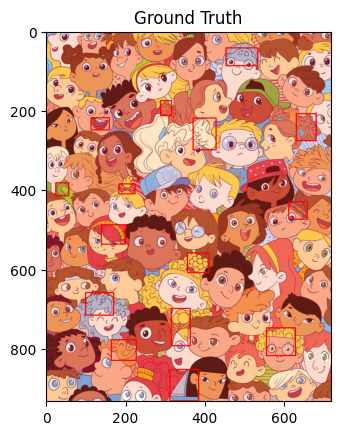

In [ ]:
# Ảnh ground_truth

In [4]:
img = cv2.imread(image_filename)
image_to_draw = img.copy()
for points_to_draw in bounding_boxes_points:
    image_to_draw = draw_bounding_box(image_to_draw, points_to_draw) 

In [5]:
from src.finding.template_matching import get_template

template_path = project_root / Path('data/templates/finding_01')
templates = get_template(template_path)

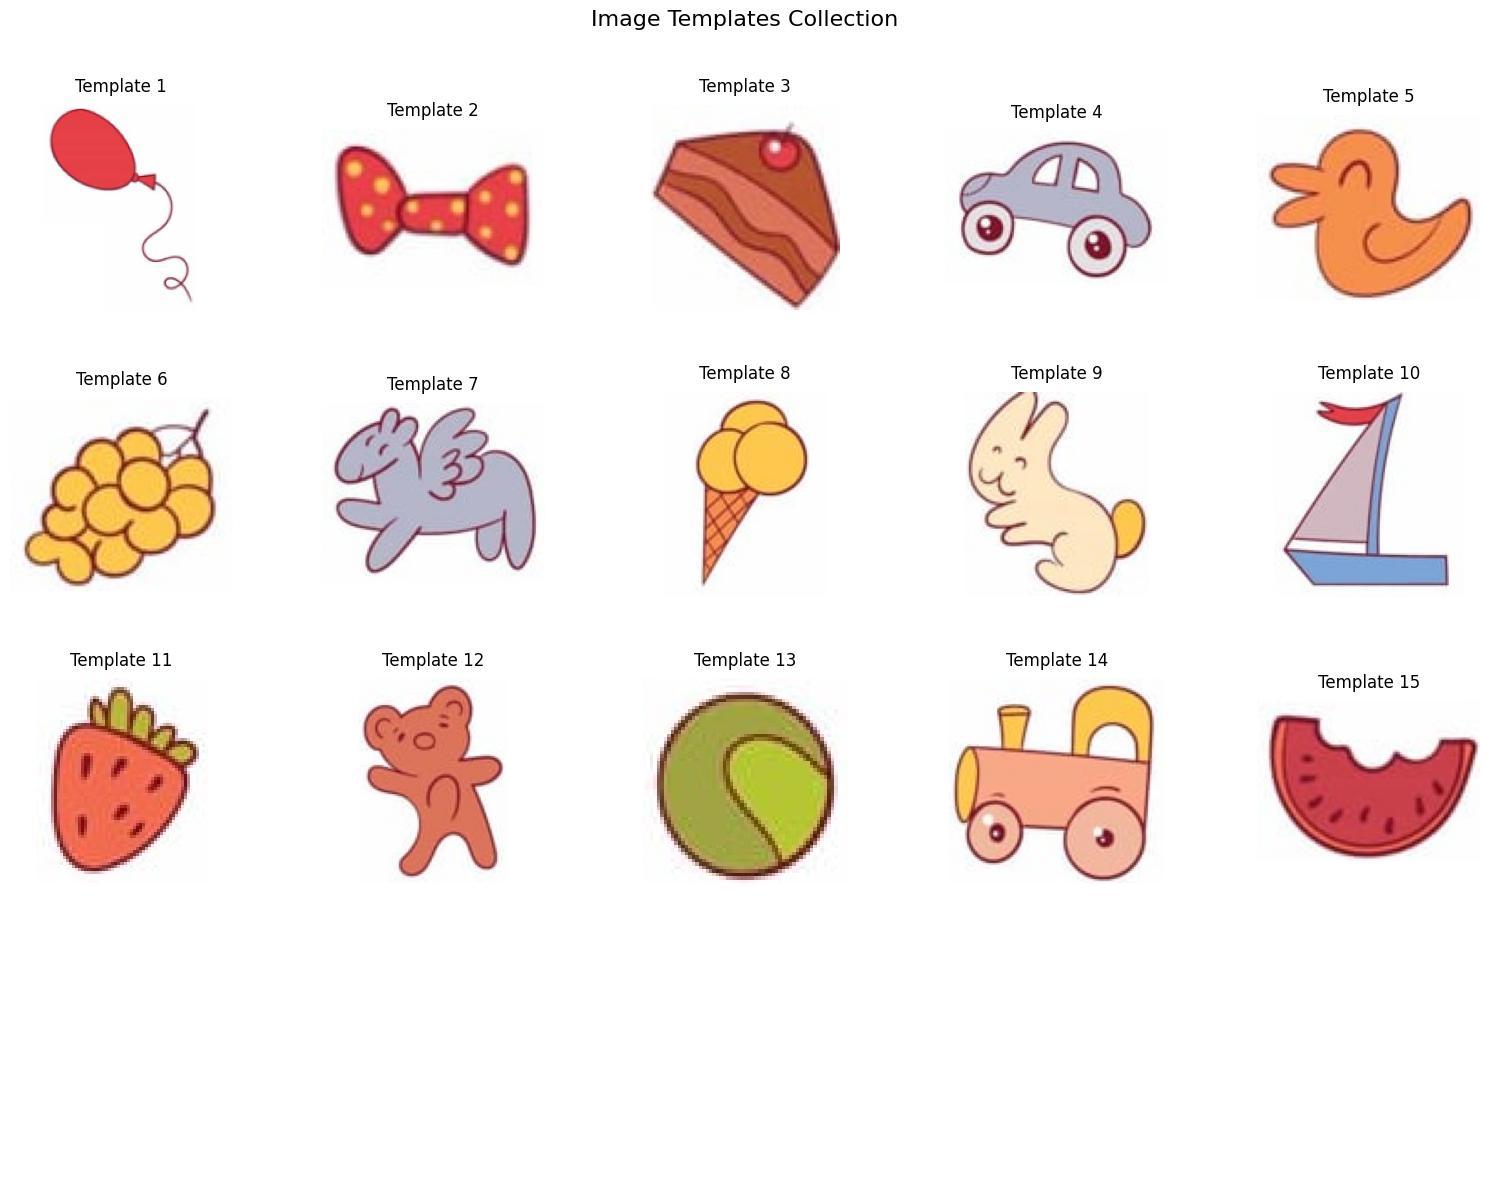

In [6]:
fig, axes = plot_image_grid(
    images=templates,
    titles=[f"Template {i+1}" for i in range(len(templates))],
    main_title="Image Templates Collection",
    rows=4,
    cols=5,
    convert_bgr2rgb=True,
    wspace=0.4,
    hspace=0.4
)
plt.show()

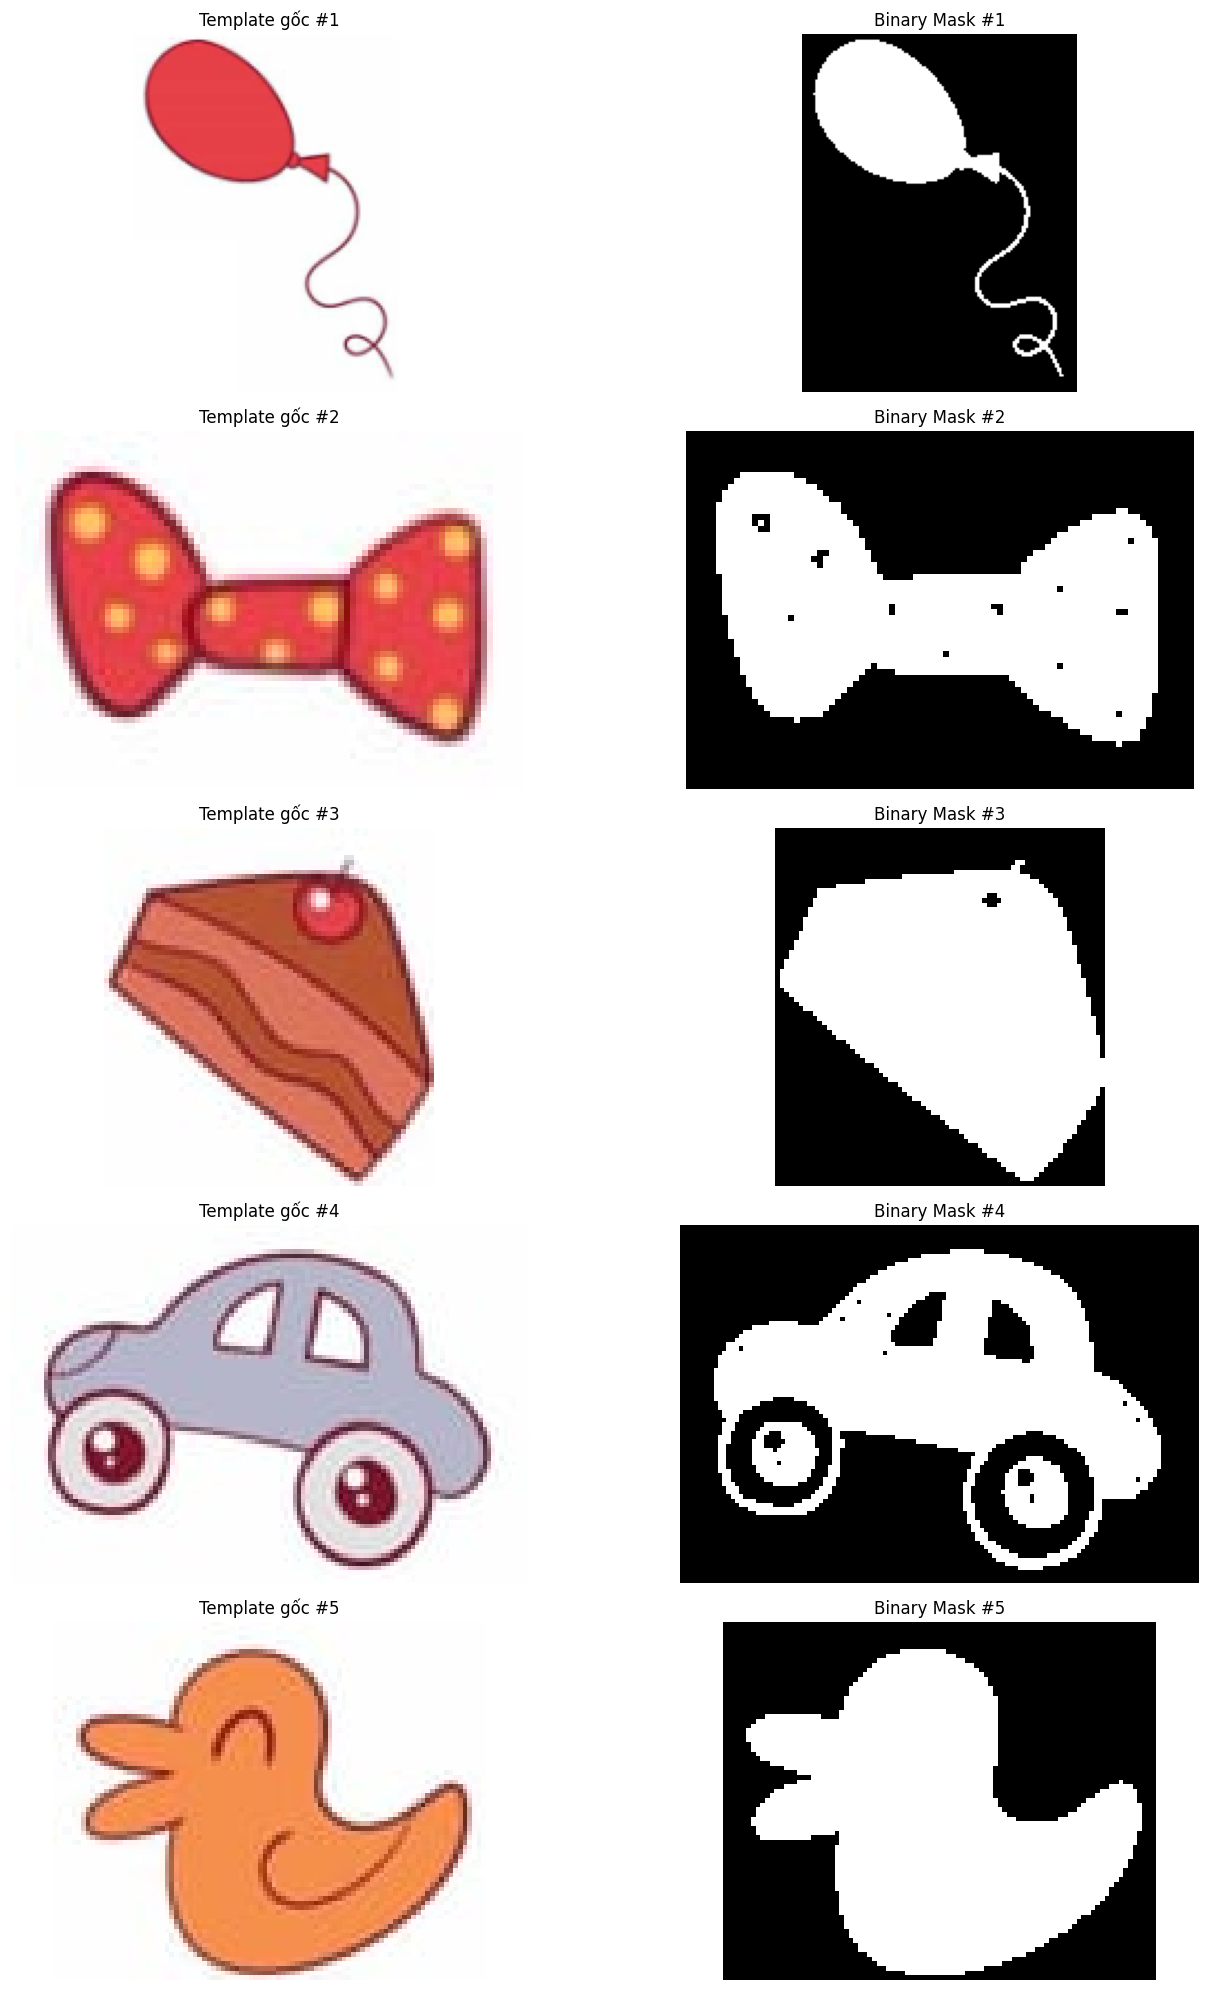

In [7]:
from src.utils.masking import convert_templates_to_binary, binary_mask, visualize_binary_templates

binary_templates = convert_templates_to_binary(templates)
visualize_binary_templates(templates, binary_templates)


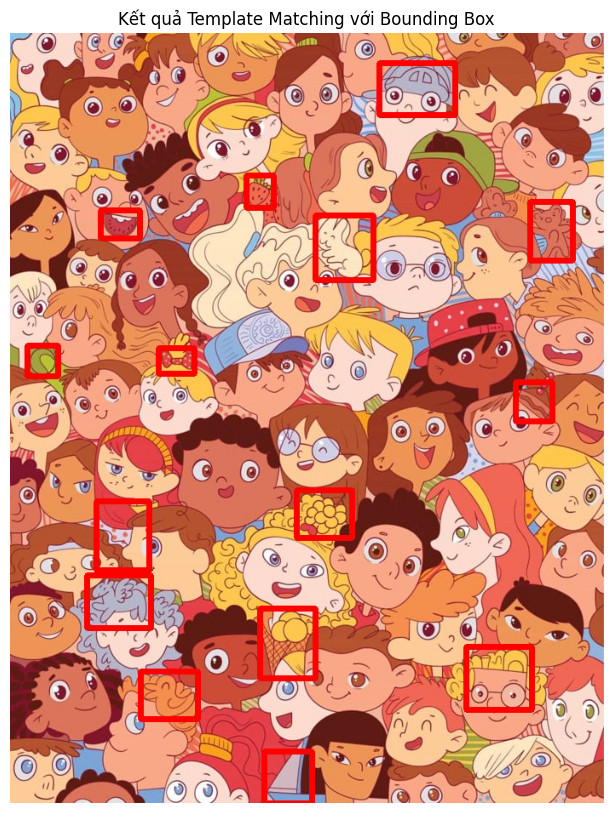

In [8]:
from src.finding.template_matching import linear_multiscale_template_matching

result_image, match_locations = linear_multiscale_template_matching(image=img, templates=templates)
plt.figure(figsize=(12, 10))
plt.imshow(cv2.cvtColor(result_image, cv2.COLOR_BGR2RGB))
plt.title("Kết quả Template Matching với Bounding Box")
plt.axis('off')
plt.show()

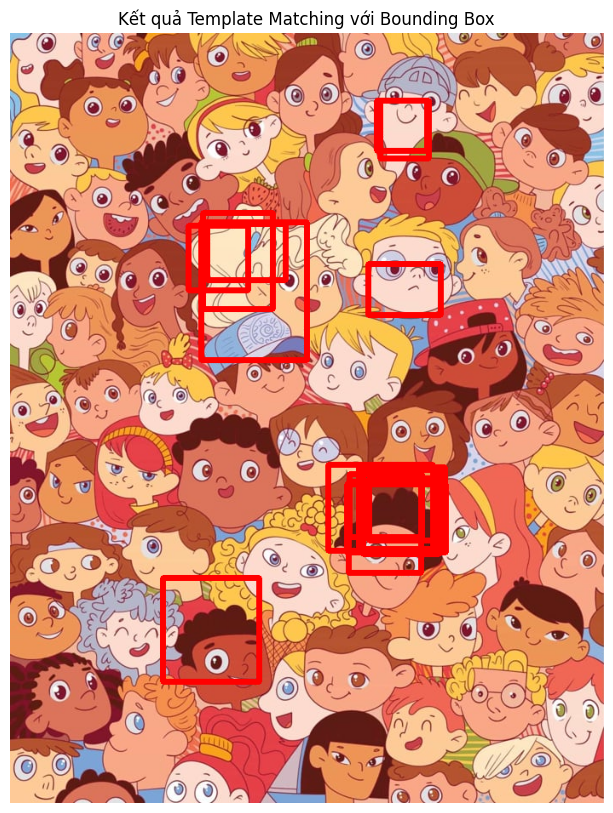

In [9]:
result_image, match_locations = linear_multiscale_template_matching(image=img, templates=templates, match_method=cv2.TM_SQDIFF)
plt.figure(figsize=(12, 10))
plt.imshow(cv2.cvtColor(result_image, cv2.COLOR_BGR2RGB))
plt.title("Kết quả Template Matching với Bounding Box")
plt.axis('off')
plt.show()

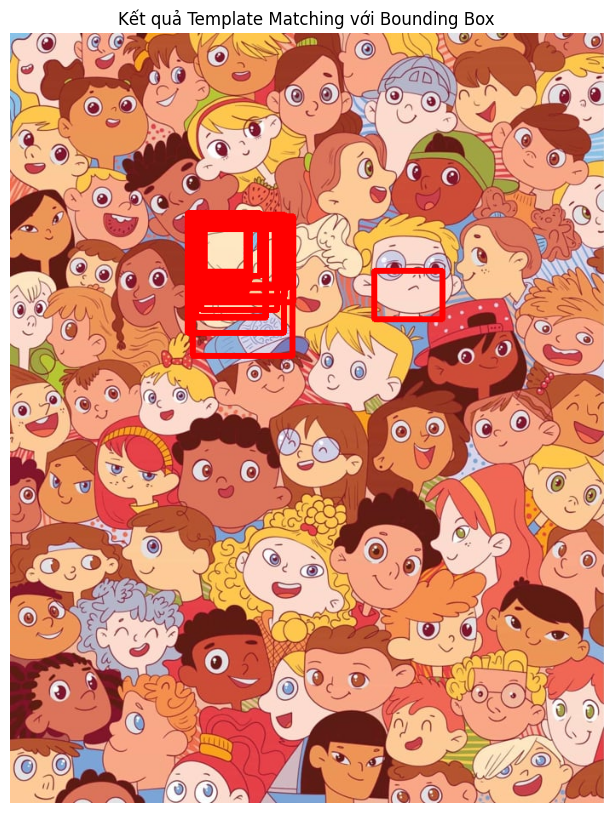

In [10]:
result_image, match_locations = linear_multiscale_template_matching(image=img, templates=templates, match_method=cv2.TM_CCORR)
plt.figure(figsize=(12, 10))
plt.imshow(cv2.cvtColor(result_image, cv2.COLOR_BGR2RGB))
plt.title("Kết quả Template Matching với Bounding Box")
plt.axis('off')
plt.show()

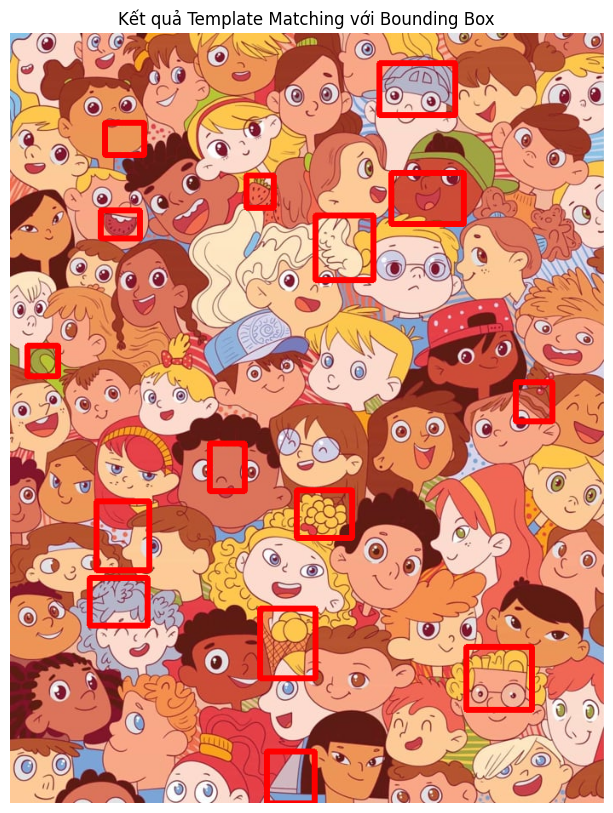

In [11]:
result_image, match_locations = linear_multiscale_template_matching(image=img, templates=templates, match_method=cv2.TM_CCORR_NORMED)
plt.figure(figsize=(12, 10))
plt.imshow(cv2.cvtColor(result_image, cv2.COLOR_BGR2RGB))
plt.title("Kết quả Template Matching với Bounding Box")
plt.axis('off')
plt.show()

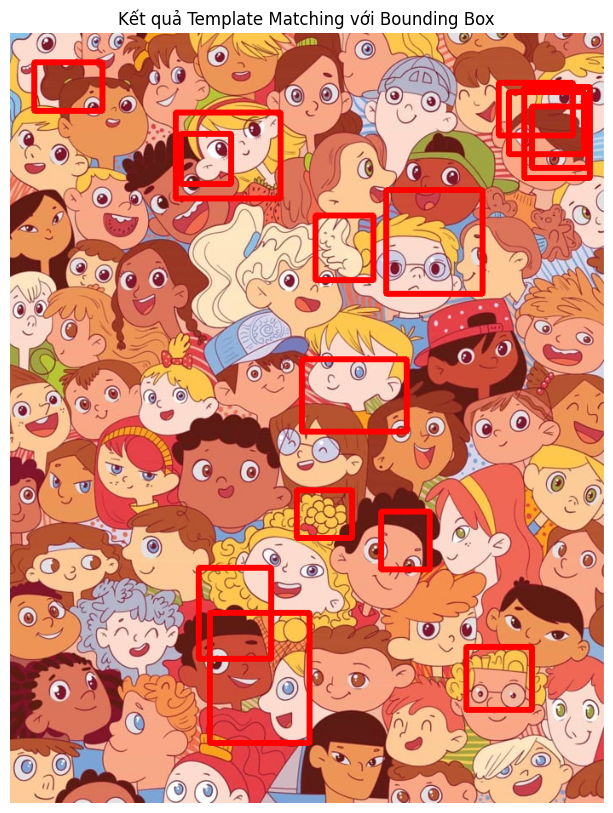

In [12]:
result_image, match_locations = linear_multiscale_template_matching(image=img, templates=templates, match_method=cv2.TM_CCOEFF)
plt.figure(figsize=(12, 10))
plt.imshow(cv2.cvtColor(result_image, cv2.COLOR_BGR2RGB))
plt.title("Kết quả Template Matching với Bounding Box")
plt.axis('off')
plt.show()

In [ ]:
from src.finding.ORB import orb_detect_and_visualize_matches

match_images, summary = orb_detect_and_visualize_matches(
    img,
    templates,
    n_features=50000,
    min_good_match_count=15,
    ratio_test_thresh=0.80,
)

print(f"\n--- Hiển thị {len(match_images)} ảnh trực quan hóa khớp ---")
for i, match_img in enumerate(match_images):
    match_info = next((item for item in summary if item['template_idx'] == i), None) # Tìm theo index (có thể không đúng nếu template bị skip)
    info = summary[i]
    title = f"Template {info['template_idx']} vs Image ({info['num_good_matches']} good matches)"

    plt.figure(figsize=(15, 8))
    plt.imshow(cv2.cvtColor(match_img, cv2.COLOR_BGR2RGB))
    plt.title(title)
    plt.axis('off')
    plt.show()

Tìm thấy 32865 keypoints trong ảnh đích.
Bắt đầu xử lý 15 templates...
Template 0: Keypoints=56, Good Matches=0
Template 1: Không tìm thấy đặc trưng ORB.
Template 2: Không tìm thấy đặc trưng ORB.
Template 3: Keypoints=22, Good Matches=0
Template 4: Số keypoints (5) quá ít.
Template 5: Số keypoints (19) quá ít.
Template 6: Keypoints=56, Good Matches=2
Template 7: Keypoints=58, Good Matches=0
Template 8: Số keypoints (15) quá ít.
Template 9: Keypoints=32, Good Matches=1
Template 10: Không tìm thấy đặc trưng ORB.
Template 11: Keypoints=21, Good Matches=0
Template 12: Không tìm thấy đặc trưng ORB.
Template 13: Keypoints=23, Good Matches=0
Template 14: Không tìm thấy đặc trưng ORB.
Hoàn thành xử lý. Tạo được 0 ảnh trực quan.

--- Hiển thị 0 ảnh trực quan hóa khớp ---
